<a href="https://www.kaggle.com/code/maimunulkjisan/titanic-transports-lightgbm-0-80827?scriptVersionId=204641528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚀 **Spaceship Titanic Prediction Notebook**
Welcome to the Spaceship Titanic prediction project! In this notebook, we’ll explore, preprocess, and build a model to predict passenger transportation on the fictional Spaceship Titanic.

## 📑 Table of Contents
1. 📂 **Data Loading and Initial Setup**
2. ✂️ **Feature Engineering**
3. 🔢 **Define Numerical and Categorical Columns**
4. 🧩 **Preprocessing Pipelines**
5. 💡 **Model Definition and Hyperparameter Tuning**
6. 🎯 **Training and Evaluation**
7. 📊 **Accuracy Comparison Table**
8. 🛠️ **Final Model Training and Prediction**
9. 📁 **Output Predictions**

---


## 📂 **1. Data Loading and Initial Setup**

In [1]:
# 🚀 Load the train and test datasets
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

y = train['Transported']
train.drop(['Transported'], axis=1, inplace=True)

test_ids = test['PassengerId']

# ✂️ 2. Custom Transformer for Feature Engineering


In [2]:
# 🧰 Define custom transformer to split 'Cabin' column into 'Deck', 'CabinNum', 'Side'
def split_cabin_column(df):
    cabin_split = df['Cabin'].str.split('/', expand=True)
    df['Deck'] = cabin_split[0]
    df['CabinNum'] = pd.to_numeric(cabin_split[1], errors='coerce')
    df['Side'] = cabin_split[2]
    df.drop(['Cabin'], axis=1, inplace=True)
    return df
train = split_cabin_column(train)
test = split_cabin_column(test)

# 🔢 3. Define Numerical and Categorical Columns

In [3]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Deck', 'Destination', 'VIP', 'Side']


# 🧩 4. Preprocessing Pipelines

In [4]:
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=2, weights='distance'))
])

categorical_pipeline = Pipeline(steps=[
    ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),
    ('onehot', OneHotEncoder(drop='first'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=2,
                                                             weights='distance'))]),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck',
                                  'CabinNum']),
                                ('cat',
                                 Pipeline(steps=[('fill_missing',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f40ba00c940>)),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['HomePlanet', 'CryoSleep', 'Deck',
                                  'Destination', 'VIP', 'Side'])])

# 💡 5. Model Definition and Hyperparameter Tuning

In [5]:
# 🔧 Define the LightGBM model
model = LGBMClassifier(random_state=42)

param_grid = {
    'classifier__n_estimators': [1000],
    'classifier__learning_rate': [0.005],
    'classifier__max_depth': [-1],
}


# 🔄 6. Encode Target Variable and Split Data

In [6]:
# 🎯 Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(train, y_encoded, test_size=0.2, random_state=42)


# 🎛️ 7. Build Pipeline and Perform Grid Search

In [7]:
# 🔗 Define pipeline with preprocessing and LightGBM classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])
pipeline
# 🔄 Perform grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfil

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1647
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=2,
                                                                                                     weights='distance'))]),
                                                                         ['Age',
                                                                          'RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'CabinNum']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('fill_missing',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f40ba00c940>)),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Deck',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Side'])])),
                                       ('classifier',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.005],
                         'classifier__max_depth': [-1],
                         'classifier__n_estimators': [1000]},
             scoring='accuracy', verbose=1)

# 📊 8. Model Evaluation

In [8]:
# 🏆 Best model and its performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("LightGBM Best Parameters:", best_params)
print("LightGBM Best Cross-Validation Accuracy:", best_score)

y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("LightGBM Validation Accuracy:", val_accuracy)

y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("LightGBM Training Accuracy:", train_accuracy)


accuracy_df = pd.DataFrame({
    'Set': ['Training', 'Validation'],
    'Accuracy': [train_accuracy, val_accuracy]
})
accuracy_df


LightGBM Best Parameters: {'classifier__learning_rate': 0.005, 'classifier__max_depth': -1, 'classifier__n_estimators': 1000}
LightGBM Best Cross-Validation Accuracy: 0.811044003451251


/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),


LightGBM Validation Accuracy: 0.8033352501437608


/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),


LightGBM Training Accuracy: 0.8561978717285016


,Set,Accuracy
0,Training,0.856198
1,Validation,0.803335


# 🛠️ 9. Final Model Training and Prediction

In [9]:

best_model.fit(train, y_encoded)
test_predictions = best_model.predict(test)
test_predictions = label_encoder.inverse_transform(test_predictions)


/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),


[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),


# 📁 10. Output Predictions

In [10]:
output = pd.DataFrame({'PassengerId': test_ids, 'Transported': test_predictions})
output.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")


Predictions saved to submission.csv


/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


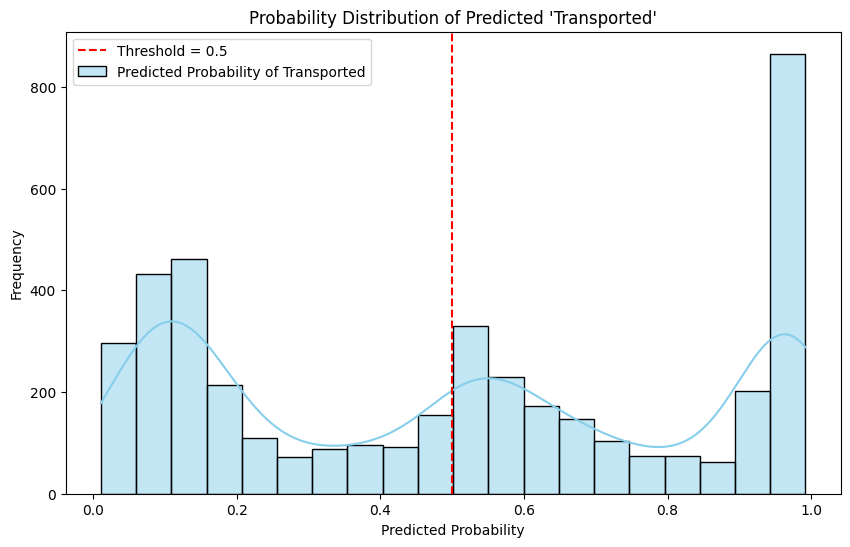

/tmp/ipykernel_17/293500980.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),


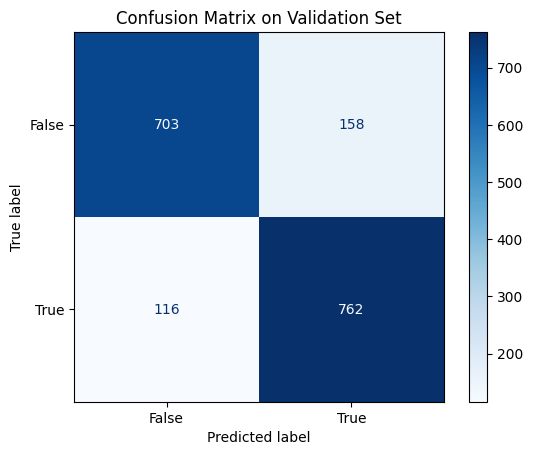

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


test_probabilities = best_model.predict_proba(test)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(test_probabilities, bins=20, kde=True, color='skyblue', label='Predicted Probability of Transported')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Probability Distribution of Predicted 'Transported'")
plt.legend()
plt.show()


test_predictions_binary = (test_probabilities >= 0.5).astype(int)
y_val_pred = best_model.predict(X_val) 
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Validation Set")
plt.show()


<div style="background-color: #f0f8ff; border-left: 6px solid #2196F3; padding: 10px;">
    <strong>Note:</strong> Ensure that all missing values are handled before moving to model training.
</div>


In [12]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score
# from lightgbm import LGBMClassifier

# # Load the train and test datasets
# train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
# test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# # Separate target variable from features in the training set
# y = train['Transported']
# train.drop(['Transported'], axis=1, inplace=True)

# # Save PassengerId from test set for final output
# test_ids = test['PassengerId']

# # Define custom transformer to split 'Cabin' column into 'Deck', 'CabinNum', 'Side'
# def split_cabin_column(df):
#     cabin_split = df['Cabin'].str.split('/', expand=True)
#     df['Deck'] = cabin_split[0]
#     df['CabinNum'] = pd.to_numeric(cabin_split[1], errors='coerce')
#     df['Side'] = cabin_split[2]
#     df.drop(['Cabin'], axis=1, inplace=True)
#     return df

# # Apply the cabin split function to train and test data
# train = split_cabin_column(train)
# test = split_cabin_column(test)

# # Define numerical and categorical columns
# numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum']
# categorical_cols = ['HomePlanet', 'CryoSleep', 'Deck', 'Destination', 'VIP', 'Side']

# # Create preprocessing pipelines for numerical and categorical data
# numerical_pipeline = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors=2, weights='distance'))
# ])

# categorical_pipeline = Pipeline(steps=[
#     ('fill_missing', FunctionTransformer(lambda df: df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x))),
#     ('onehot', OneHotEncoder(drop='first'))
# ])

# # Combine preprocessing steps for full dataset
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_pipeline, numerical_cols),
#         ('cat', categorical_pipeline, categorical_cols)
#     ],
#     remainder='drop'
# )

# # Define the LightGBM model
# model = LGBMClassifier(random_state=42)

# # Define hyperparameter grid for LightGBM
# param_grid = {
#     'classifier__n_estimators': [1000],
#     'classifier__learning_rate': [0.005],
#     'classifier__max_depth': [-1],
# }


# # Encode target variable
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(train, y_encoded, test_size=0.2, random_state=42)

# # Define pipeline with preprocessing and LightGBM classifier
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', model)
# ])

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=3,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the model and find the best parameters
# grid_search.fit(X_train, y_train)

# # Best model and its performance
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Print best parameters and cross-validation accuracy
# print("LightGBM Best Parameters:", best_params)
# print("LightGBM Best Cross-Validation Accuracy:", best_score)

# # Validate the best model on the validation set
# y_val_pred = best_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print("LightGBM Validation Accuracy:", val_accuracy)

# # Calculate training accuracy
# y_train_pred = best_model.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("LightGBM Training Accuracy:", train_accuracy)

# # Create a DataFrame to show the accuracies
# accuracy_df = pd.DataFrame({
#     'Set': ['Training', 'Validation'],
#     'Accuracy': [train_accuracy, val_accuracy]
# })

# # Print the accuracy DataFrame
# print(accuracy_df)

# # Train on the entire training set with the best model for final predictions
# best_model.fit(train, y_encoded)
# test_predictions = best_model.predict(test)

# # Decode predictions back to original labels
# test_predictions = label_encoder.inverse_transform(test_predictions)

# # Save predictions to a CSV file for submission or analysis
# output = pd.DataFrame({'PassengerId': test_ids, 'Transported': test_predictions})
# output.to_csv('submission.csv', index=False)

# print("Predictions saved to submission.csv")

